# Data Modelling and Evaluations

With preprocessing and data cleaning from the previous step, we now have a clean dataset that falls in the inclusive range of [0,1]. This helps model to generaize the weights of significantly high values like high age values and some missing values.

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [432]:
path = 'C:/Users/MANEET/bank_marketing'
data_add = '/data'
report_add = '/report'
figures_add = '/figures'
experiment_add = '/experiments'

## Import processed data which is ready for modelling

In [433]:
X_over_preprocessed= pd.read_csv(path + data_add + '/processed/Over_processed_features.csv',index_col=0)
y_over_preprocessed= pd.read_csv(path + data_add + '/processed/Over_processed_labels.csv',index_col=0)
X_over_preprocessed.shape, y_over_preprocessed.shape

((73096, 62), (73096, 1))

In [434]:
X_under_preprocessed= pd.read_csv(path + data_add + '/processed/Under_processed_features.csv',index_col=0)
y_under_preprocessed= pd.read_csv(path + data_add + '/processed/Under_processed_labels.csv',index_col=0)
X_under_preprocessed.shape, y_under_preprocessed.shape

((9280, 61), (9280, 1))

In [435]:
X_raw_preprocessed = pd.read_csv(path + data_add +'/processed/Raw_processed_features.csv',index_col=0)
y_raw_preprocessed = pd.read_csv(path + data_add + '/processed/Raw_processed_labels.csv',index_col=0)
X_raw_preprocessed.shape, y_raw_preprocessed.shape

((41188, 62), (41188, 1))

## Data Modelling <a class="anchor" id="seven-bullet"></a>

In [436]:
import time
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Assigning dictionary of models
dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


In [437]:
# Defining a function to test classifiers with 3 fold cross validation to form a baseline performance

no_classifiers = len(dict_classifiers.keys())

def cv_model(X_train,Y_train,verbose = True):
    df_results = pd.DataFrame()
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        cross_val = cross_val_score(classifier,X_train, Y_train, cv = 3)
        t_end = time.clock()
        t_diff = t_end - t_start
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Total_time'] = t_diff
        df_results.loc[count,'Cross Val Mean Score'] = cross_val.mean()
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

### Using Raw Preprocessed Data

In [438]:
cv_raw_results = cv_model(X_raw_preprocessed.values,y_raw_preprocessed.values)
cv_raw_results = cv_raw_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_raw_results)

trained Nearest Neighbors in 46.03 s
trained Random Forest in 15.30 s
trained Gradient Boosting Classifier in 46.45 s
                     Classifier  Total_time  Cross Val Mean Score
2  Gradient Boosting Classifier   46.452167              0.547943
0             Nearest Neighbors   46.026236              0.524270
1                 Random Forest   15.302129              0.395783


<b>Lets evaluate the best performing model on test set</b>

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X_raw_preprocessed, y_raw_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
print(best_clf)
best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7301
           1       0.67      0.50      0.57       937

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [440]:
X_train.to_csv(path + experiment_add + '/raw_X_train.csv',index = False)
X_test.to_csv(path + experiment_add + '/raw_X_test.csv',index = False)
y_train.to_csv(path + experiment_add + '/raw_y_train.csv',index = False)
y_test.to_csv(path + experiment_add + '/raw_y_test.csv',index = False)
np.savetxt(path + experiment_add + '/raw_y_pred.csv', y_pred, delimiter=",")

### Experiment using Undersampling

In [441]:
cv_under_results = cv_model(X_under_preprocessed,y_under_preprocessed)
cv_under_results = cv_under_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_under_results)

trained Nearest Neighbors in 2.88 s
trained Random Forest in 4.28 s
trained Gradient Boosting Classifier in 7.98 s
                     Classifier  Total_time  Cross Val Mean Score
0             Nearest Neighbors    2.876624              0.603246
2  Gradient Boosting Classifier    7.982241              0.462824
1                 Random Forest    4.278990              0.448276


<b>Lets evaluate the best performing model on test set</b>

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X_under_preprocessed, y_under_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_under_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
y_pred= best_clf.predict(X_test)

In [443]:
print(best_clf)
print(metrics.classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       969
           1       0.78      0.72      0.75       887

    accuracy                           0.77      1856
   macro avg       0.77      0.77      0.77      1856
weighted avg       0.77      0.77      0.77      1856



In [444]:
X_train.to_csv(path + experiment_add + '/undersampled_X_train.csv', index = False)
X_test.to_csv(path + experiment_add + '/undersampled_X_test.csv', index = False)
y_train.to_csv(path + experiment_add + '/undersampled_y_train.csv', index = False)
y_test.to_csv(path + experiment_add + '/undersampled_y_test.csv', index = False)
np.savetxt(path + experiment_add + '/undersampled_y_pred.csv', Under_labels, delimiter=",")

### Using Oversampling method

In [445]:
cv_over_results = cv_model(X_over_preprocessed,y_over_preprocessed)
cv_over_results = cv_over_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_over_results)

trained Nearest Neighbors in 128.85 s
trained Random Forest in 20.50 s
trained Gradient Boosting Classifier in 42.25 s
                     Classifier  Total_time  Cross Val Mean Score
2  Gradient Boosting Classifier   42.248165              0.690584
1                 Random Forest   20.504631              0.580676
0             Nearest Neighbors  128.853402              0.557131


In [453]:
X_train, X_test, y_train, y_test = train_test_split(X_over_preprocessed, y_over_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_over_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
over_labels = best_clf.predict(X_test)
print(metrics.classification_report(y_test,over_labels))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7353
           1       0.86      0.94      0.90      7267

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



In [454]:
X_train.to_csv(path + experiment_add + '/Oversampled_X_train.csv',index= False)
X_test.to_csv(path + experiment_add + '/Oversampled_X_test.csv',index= False)
y_train.to_csv(path + experiment_add + '/Oversampled_y_train.csv',index= False)
y_test.to_csv(path + experiment_add + '/Oversampled_y_test.csv',index= False)
np.savetxt(path + experiment_add + '/Oversampled_y_pred.csv', over_labels, delimiter=",")

## Based on the results obtained I will finetune all 3 models only using the oversampled data. This is party because undersampling eliminates 80% of the data limiting model to generalize. 

<b>Starting with RandomForestClassifier</b>

In [ ]:
# Calling Random Forest Classifier
rfc=RandomForestClassifier(random_state=42)

In [ ]:
# Setting the grid parameters
param_grid = { 
    'n_estimators': np.arange(2,19,3),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Evaluating the grid parameters
X_train, X_test, y_train, y_test = train_test_split(X_over_preprocessed, y_over_preprocessed, test_size=0.20)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

In [455]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 11}

In [456]:
finetune_rf = CV_rfc.best_estimator_
finetune_rf.fit(X_test,y_test)
rf_pred = finetune_rf.predict(X_test)


In [457]:
print(metrics.classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7353
           1       0.84      0.93      0.88      7267

    accuracy                           0.88     14620
   macro avg       0.88      0.88      0.87     14620
weighted avg       0.88      0.88      0.87     14620



In [ ]:
k_range = list(range(3, 10 ,2))

weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=3, scoring='accuracy', random_state=5, n_jo)

rand.fit(X_train, y_train)

In [458]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.9279533483822423
{'weights': 'distance', 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [459]:
finetune_rand = rand.best_estimator_
finetune_rand.fit(X_train,y_train)
knn_pred = finetune_rand.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      7353
           1       0.90      1.00      0.95      7267

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



In [ ]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

result = clf.predict(X_test)


In [460]:
tune_clf = clf.best_estimator_
tune_clf.fit(X_train,y_train)
GB_pred = tune_clf.predict(X_test)
print(metrics.classification_report(y_test,GB_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7353
           1       0.95      1.00      0.97      7267

    accuracy                           0.97     14620
   macro avg       0.97      0.97      0.97     14620
weighted avg       0.97      0.97      0.97     14620



In [461]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators = [("rf",finetune_rf),("knn",finetune_rand),("gnb",tune_clf)], voting = 'hard',n_jobs = -1)
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=11,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('gnb',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=9,
                                                         n_estimators=500))],
                 n_jobs=-1)

##  Model Analysis <a class="anchor" id="eight-bullet"></a>

In [462]:
final_preds = ensemble.predict(X_test)

In [463]:
print(metrics.classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      7353
           1       0.92      1.00      0.96      7267

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620



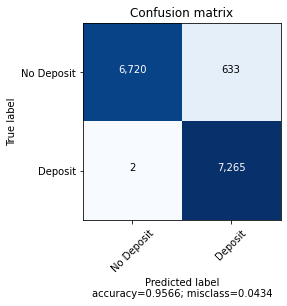

<Figure size 432x288 with 0 Axes>

In [464]:
fig = plot_confusion_matrix(metrics.confusion_matrix(y_test,final_preds), target_names= ['No Deposit', 'Deposit'], normalize=False)
plt.savefig(path + figures_add + '/Ensemble_CM.png')
plt.show(fig)

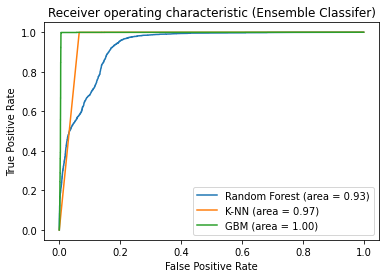

In [465]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

baseline_roc_auc = roc_auc_score(y_test, finetune_rf.predict_proba(X_test)[:,1])
fprB, tprB, thresholdsB = roc_curve(y_test, finetune_rf.predict_proba(X_test)[:,1])

model1_roc_auc = roc_auc_score(y_test, finetune_rand.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, finetune_rand.predict_proba(X_test)[:,1])

new_roc_auc = roc_auc_score(y_test, tune_clf.predict_proba(X_test)[:,1])
fprnew, tprnew, thresholds_new = roc_curve(y_test, tune_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='Random Forest (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='K-NN (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM (area = %0.2f)' % new_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Ensemble Classifer)')
plt.legend(loc="lower right")
plt.savefig(path + figures_add + '/Roc_curve.png')
plt.show()

### Calculating the feature importances using the best fit random forest classifier

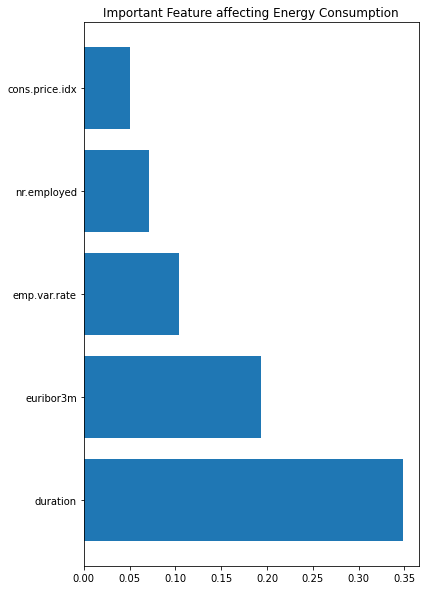

In [466]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize = [6,10])
    plt.title("Important Feature affecting Energy Consumption")
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# passing our column names
feature_names = X_train.columns 

# calling feature importance function to plot the most important features for energy consumption
f_importances((finetune_rf.feature_importances_), feature_names, top=5)

In [413]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [428]:
copy_df = cv_model(X_under_preprocessed,y_under_preprocessed)
copy_under_results = copy_df.sort_values(by='Cross Val Mean Score', ascending=False)
print(copy_under_results)

trained Nearest Neighbors in 2.98 s
trained Random Forest in 4.52 s
trained Gradient Boosting Classifier in 8.56 s
                     Classifier  Total_time  Cross Val Mean Score
0             Nearest Neighbors    2.979170              0.603246
2  Gradient Boosting Classifier    8.555327              0.462932
1                 Random Forest    4.518927              0.447521


In [431]:
X_train, X_test, y_train, y_test = train_test_split(X_under_preprocessed, y_under_preprocessed, test_size=0.20)
sample_clf = dict_classifiers.get(copy_under_results.Classifier.iloc[0])
print(sample_clf)
sample_clf.fit(X_train,y_train)
demo_under_preds= sample_clf.predict(X_test)

KNeighborsClassifier()


In [430]:
print(metrics.classification_report(y_test,demo_under_preds))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       904
           1       0.81      0.71      0.76       952

    accuracy                           0.76      1856
   macro avg       0.77      0.77      0.76      1856
weighted avg       0.77      0.76      0.76      1856

